# Our first Kaggle Competition.

For this assignment we are going to submit our first submission in Kaggle for the [the Titanic Dataset Competition](https://www.kaggle.com/c/titanic/data).

Kaggle is a website where data scientists can compete on Data Science competitions where the goal is to provide the best predictions for a specific dataset. Companies launch these competitions and usually give substantial rewards (in the order of thousands of dollars).

For the titanic competition, the dataset has passenger information for every passenger that was aboard the titanic on its first (and last trip). 

The target variable is whether the passenger died or not when the cruise ship sank
You can download the competition data (and check the data dictionary) on [kaggle](https://www.kaggle.com/c/titanic/data).

You will use the training data (file `train.csv`) to train your classifier, and will create submissions for the `test.csv`. 

Basically, you have to submit a csv file on the shape:

```
PassengerId,Survived
892,0
893,1
894,1
895,0
...
```

Where the PassengerId are the ids of the passengers on the `test.csv` dataset and `Survived` is your model prediction about the passenger (0, die, 1 survives).

In order to submit a file you have to create a profile on the website. Then you can upload the submission using the Website or using the [kaggle api](https://github.com/Kaggle/kaggle-api)

In [196]:
from IPython.display import Image
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from ipywidgets import widgets, interact
from sklearn.model_selection import train_test_split
from sklearn import metrics
import warnings
warnings.simplefilter("ignore")
%matplotlib inline

matplotlib.rcParams['figure.figsize'] = [10, 10]

In [233]:
test = pd.read_csv("TitanicData/test.csv")
train = pd.read_csv("TitanicData/train.csv")
submit = pd.read_csv("TitanicData/gender_submission.csv")

In [234]:
train["Sex"].replace("male", 1, inplace = True)
train["Sex"].replace("female", 0, inplace = True)

In [93]:
train["Sex 2: The Sequel"] = train["Sex"]

In [235]:
#train["Age"] = train["Age"].fillna(0)
train = train[train.Age > 0]

In [236]:
train.head(30)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,NaN,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",0,4.0,1,1,PP 9549,16.7000,G6,S


In [237]:
independent_variables = train[["Pclass","Sex", "Age", "Fare"]]

In [238]:
X = independent_variables
y = train["Survived"]

In [239]:
X.head()

,Pclass,Sex,Age,Fare
0,3,1,22.0,7.2500
1,1,0,38.0,71.2833
2,3,0,26.0,7.9250
3,1,0,35.0,53.1000
4,3,1,35.0,8.0500


In [240]:
X_train, X_test = train_test_split(X, test_size=0.3, random_state=69)
y_train, y_test = train_test_split(y, test_size=0.3, random_state=69)

In [241]:
model = LogisticRegression()

model.fit(X_train, y_train)

predictions = model.predict(X_test)
true_classes = y_test
prediction_probabilities = model.predict_proba(X_test)

In [242]:
def tuple_class_prediction(y_true, y_pred):
    return list(zip(y_true, y_pred))

tuple_class_prediction(true_classes, predictions)[:10]

[(1, 1),
 (1, 1),
 (0, 0),
 (1, 0),
 (1, 0),
 (1, 1),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0)]

In [243]:
def TP(true_classes, predictions):
    pairs_class_prediction = tuple_class_prediction(true_classes, predictions)
    return len([obs for obs in pairs_class_prediction if obs[0]==1 and obs[1]==1])

def TN(true_classes, predictions):
    pairs_class_prediction = tuple_class_prediction(true_classes, predictions)
    return len([obs for obs in pairs_class_prediction if obs[0]==0 and obs[1]==0])
    
def FP(true_classes, predictions):
    pairs_class_prediction = tuple_class_prediction(true_classes, predictions)
    return len([obs for obs in pairs_class_prediction if obs[0]==0 and obs[1]==1])

def FN(true_classes, predictions):
    pairs_class_prediction = tuple_class_prediction(true_classes, predictions)
    return len([obs for obs in pairs_class_prediction if obs[0]==1 and obs[1]==0])


print("""
True Positives: {}
True Negatives: {}
False Positives: {}
False Negatives: {}
""".format(
    TP(true_classes, predictions),
    TN(true_classes, predictions),
    FP(true_classes, predictions),
    FN(true_classes, predictions)    
))    


True Positives: 78
True Negatives: 103
False Positives: 15
False Negatives: 19



In [244]:
def evaluate_model(true_classes, predictions):
    accuracy = metrics.accuracy_score(true_classes, predictions)
    precision = metrics.average_precision_score(true_classes, predictions)
    recall = metrics.recall_score(true_classes, predictions)
    auc = metrics.roc_auc_score(true_classes, predictions)
    f1 = metrics.f1_score(true_classes, predictions)
    print("""
    Accuracy: {:.3f}
    Precision: {:.3f}
    Recall: {:.3f}
    AUC: {:.3f}
    F1 Score: {:.3f}
    """.format(
        accuracy, 
        precision,
        recall,
        auc,
        f1
    ))
    
evaluate_model(true_classes, predictions)


    Accuracy: 0.842
    Precision: 0.763
    Recall: 0.804
    AUC: 0.839
    F1 Score: 0.821
    


In [245]:
def AUC_calc(true_classes, predictions):
    auc = metrics.roc_auc_score(true_classes, predictions)
    return auc

In [246]:
import numpy as np
C_range = np.linspace(0.01, 1, 10000)

In [247]:
new_auc = []

In [248]:
for x in C_range:
    model = LogisticRegression(penalty="l2", C = x)
    
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    true_classes = y_test
    prediction_probablilities = model.predict_proba(X_test)
    
    t = AUC_calc(true_classes, predictions)
    new_auc.append(t)

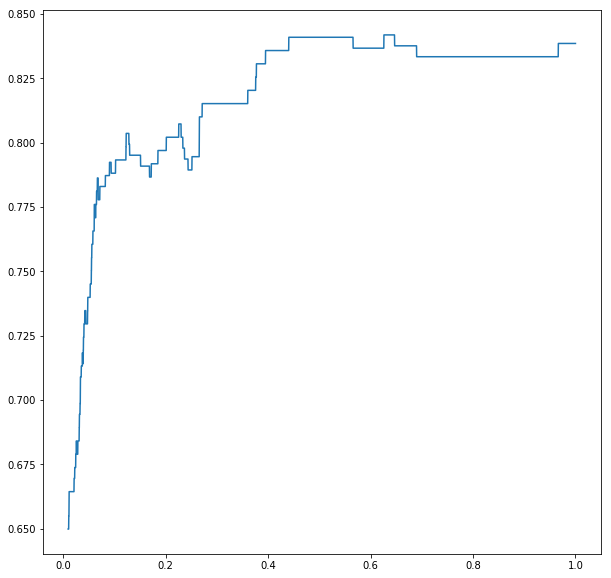

In [249]:
fig = plt.figure()
ax = plt.axes()
ax.plot(C_range, new_auc)

In [250]:
model = LogisticRegression(penalty="l2", C = 1)
model

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [251]:
model = LogisticRegression(C = 1)

model.fit(X_train, y_train)

predictions = model.predict(X_test)
true_classes = y_test
prediction_probabilities = model.predict_proba(X_test)

In [252]:
def TP(true_classes, predictions):
    pairs_class_prediction = tuple_class_prediction(true_classes, predictions)
    return len([obs for obs in pairs_class_prediction if obs[0]==1 and obs[1]==1])

def TN(true_classes, predictions):
    pairs_class_prediction = tuple_class_prediction(true_classes, predictions)
    return len([obs for obs in pairs_class_prediction if obs[0]==0 and obs[1]==0])
    
def FP(true_classes, predictions):
    pairs_class_prediction = tuple_class_prediction(true_classes, predictions)
    return len([obs for obs in pairs_class_prediction if obs[0]==0 and obs[1]==1])

def FN(true_classes, predictions):
    pairs_class_prediction = tuple_class_prediction(true_classes, predictions)
    return len([obs for obs in pairs_class_prediction if obs[0]==1 and obs[1]==0])


print("""
True Positives: {}
True Negatives: {}
False Positives: {}
False Negatives: {}
""".format(
    TP(true_classes, predictions),
    TN(true_classes, predictions),
    FP(true_classes, predictions),
    FN(true_classes, predictions)    
))    


True Positives: 78
True Negatives: 103
False Positives: 15
False Negatives: 19



In [253]:
def evaluate_model(true_classes, predictions):
    accuracy = metrics.accuracy_score(true_classes, predictions)
    precision = metrics.average_precision_score(true_classes, predictions)
    recall = metrics.recall_score(true_classes, predictions)
    auc = metrics.roc_auc_score(true_classes, predictions)
    f1 = metrics.f1_score(true_classes, predictions)
    print("""
    Accuracy: {:.3f}
    Precision: {:.3f}
    Recall: {:.3f}
    AUC: {:.3f}
    F1 Score: {:.3f}
    """.format(
        accuracy, 
        precision,
        recall,
        auc,
        f1
    ))
    
evaluate_model(true_classes, predictions)


    Accuracy: 0.842
    Precision: 0.763
    Recall: 0.804
    AUC: 0.839
    F1 Score: 0.821
    


In [295]:
gend = pd.read_csv("TitanicData/gender_submission.csv")

In [296]:
gend.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [297]:
test_og = pd.read_csv("TitanicData/test.csv", index_col = "PassengerId")
test = test_og

In [298]:
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [300]:
independent_variables = ["Pclass","Sex", "Age", "Fare"]
#x = td1[independent_variables].fillna(0)
#y = td1["Survived"]

pkmn = train[independent_variables]
model = LogisticRegression()
model.fit(X=pkmn, y=train["Survived"])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [301]:
predictions = model.predict(pkmn)
evaluate_model(train["Survived"], predictions)


    Accuracy: 0.794
    Precision: 0.662
    Recall: 0.703
    AUC: 0.780
    F1 Score: 0.735
    


In [305]:
test["Sex"].replace("male", 1, inplace = True)
test["Sex"].replace("female", 0, inplace = True)

In [306]:
x = test[independent_variables].fillna(0)

In [307]:
predictions = model.predict(x[independent_variables])

In [308]:
x["Survived"] = predictions

In [310]:
submission1 = x

In [313]:
submission1.head()

,Pclass,Sex,Age,Fare,Survived
PassengerId,,,,,
892,3,1,34.5,7.8292,0
893,3,0,47.0,7.0000,0
894,2,1,62.0,9.6875,0
895,3,1,27.0,8.6625,0
896,3,0,22.0,12.2875,1


In [319]:
submission1_1= pd.DataFrame(submission1)

In [327]:
submission1_1.head()

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,1


In [328]:
submission1_1.to_csv("TitanicData/submission1")